In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Komoran 불러오기
from konlpy.tag import Komoran
komoran = Komoran()

In [4]:
# 기관
df = pd.read_excel('/Users/charles/git/metaverse/data/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df[['기관']].to_csv('/Users/charles/git/metaverse/data/bigkinds_institution.txt', index=False, header=False)
f = open("/Users/charles/git/metaverse/data/bigkinds_institution.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [5]:
# 단어 2차원 리스트
word = []
for i in range(len(lines)):
    word.append(komoran.nouns(lines[i]))
word = [[y for y in x if not len(y)==1] for x in word]   # 2자 이상 
word = [[y for y in x if not y.isdigit()] for x in word] # 숫자판별

In [6]:
# 단어 1차원 리스트 함수
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

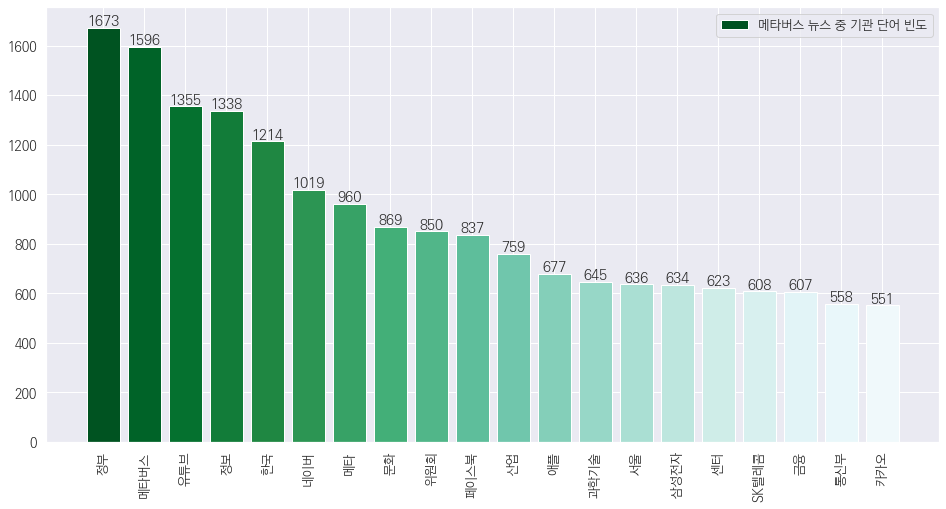

In [7]:
# 단어빈도
df1 = pd.DataFrame({'단어':flatten(word)})
value_counts = df1['단어'].value_counts(dropna=True, sort=True)
df1 = pd.DataFrame(value_counts).reset_index()
df1.columns = ['단어', '빈도']
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
f, ax = plt.subplots(figsize=(16, 8))
plot = ax.bar(df1[:20]['단어'], df1[:20]['빈도'], color=sns.color_palette("BuGn_r", df1[:20]['단어'].size))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticklabels(df1[:20]['단어'], rotation='vertical') 
plt.legend(labels=['메타버스 뉴스 중 기관 단어 빈도'], loc='upper right')
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_institution.png', bbox_inches='tight')

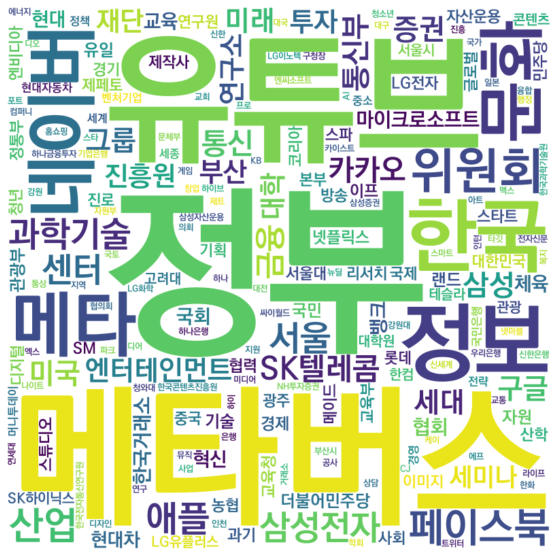

In [8]:
# 기관 워드클라우드
from wordcloud import WordCloud
from collections import Counter

font_path = '/Users/charles/Library/Fonts/KoPub Dotum Bold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(flatten(word))

wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_institution_wordcloud.png', bbox_inches='tight')
plt.show()

In [9]:
# 제목
df = pd.read_excel('/Users/charles/git/metaverse/data/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df[['제목']].to_csv('/Users/charles/git/metaverse/data/bigkinds_title.txt', index=False, header=False)
f = open("/Users/charles/git/metaverse/data/bigkinds_title.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [10]:
# 단어 2차원 리스트
word = []
for i in range(len(lines)):
    word.append(komoran.nouns(lines[i]))
word = [[y for y in x if not len(y)==1] for x in word]   # 2자 이상 
word = [[y for y in x if not y.isdigit()] for x in word] # 숫자판별

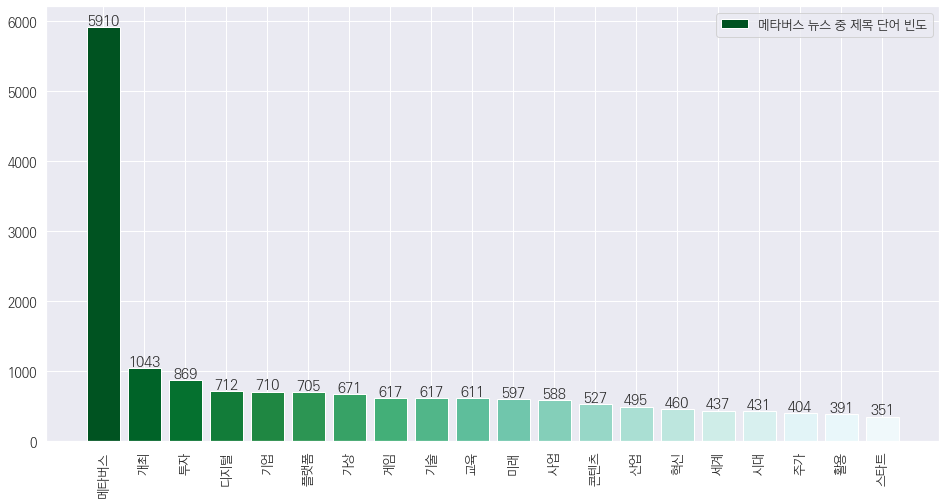

In [11]:
# 단어빈도
df1 = pd.DataFrame({'단어':flatten(word)})
value_counts = df1['단어'].value_counts(dropna=True, sort=True)
df1 = pd.DataFrame(value_counts).reset_index()
df1.columns = ['단어', '빈도']
f, ax = plt.subplots(figsize=(16, 8))
plot = ax.bar(df1[:20]['단어'], df1[:20]['빈도'], color=sns.color_palette("BuGn_r", df1[:20]['단어'].size))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticklabels(df1[:20]['단어'], rotation='vertical') 
plt.legend(labels=['메타버스 뉴스 중 제목 단어 빈도'], loc='upper right')
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_title.png', bbox_inches='tight')

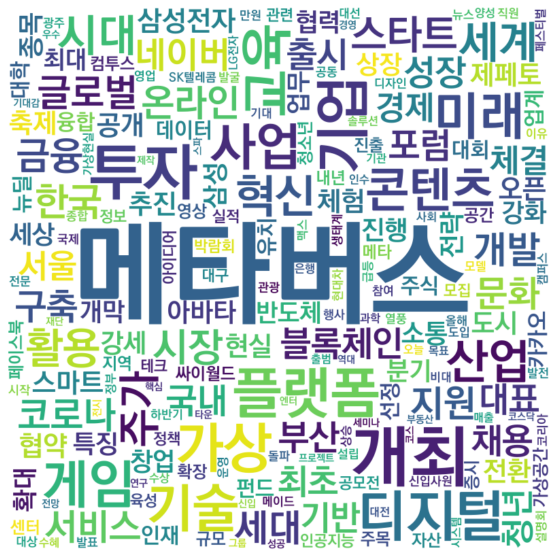

In [13]:
# 제목 워드클라우드
font_path = '/Users/charles/Library/Fonts/KoPub Dotum Bold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(flatten(word))

# stopwords = ["메타버스"]
# [count.pop(stopword) for stopword in stopwords]

wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_title_wordcloud.png', bbox_inches='tight')
plt.show()